## Intro
### To instal finance run

pip install yfinance

pip install statsmodels

### Advise
For Quant Trading or Quant Research roles in finance, especially on the buy-side, it’s helpful to know that many core trading platforms and infrastructure components are built in C++, due to its speed and low-level memory control. While not mandatory for all roles, learning C++ can be a strong advantage—particularly if you're targeting firms involved in high-frequency trading (HFT) or any latency-sensitive strategies.

That said, Python remains the most widely used language for research and prototyping. You’ll want to be very comfortable with core libraries like NumPy, pandas, and scikit-learn—these are essential for data analysis, backtesting, and machine learning. Familiarity with Jupyter notebooks, code modularity, and version control (like Git) is also expected in many research teams.

On the statistical modeling side, your physics background likely gives you a head start. Many of the core quant techniques include:

Linear regression and multivariate analysis
Time-series modeling (e.g., ARIMA, GARCH)
Dimensionality reduction (e.g., PCA)
Optimization techniques
Machine learning algorithms (like random forests, gradient boosting, and even deep learning, depending on the firm)

The overarching goal in these roles is to identify *alpha signals*—statistical patterns or features in market data that can be used to generate profitable trades. This involves ingesting large datasets, cleaning and analyzing them, and building models that capture market inefficiencies.

If you're already familiar with statistical modeling and ML techniques—and comfortable coding in Python—you’re in a strong position to start applying. Many firms are very open to candidates with strong analytical backgrounds, even if they don’t yet have direct finance experience.

Avoid the larger or local banks if you want to stay in Singapore. Target companies with a size smaller than 20 in SG. They are not as affected by visa sponsorship requirements. 

Banks will be tougher as they have a requirement for locals and PRs only due to visa sponsorship limitations

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download S&P 500 data from 2000-01-01 to 2009-12-31
sp500 = yf.download('^GSPC', start='2000-01-01', end='2009-12-31')

# Show first few rows
print(sp500.head())

# Optional: save to CSV
sp500.to_csv('sp500_2000_2009.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000


### Data

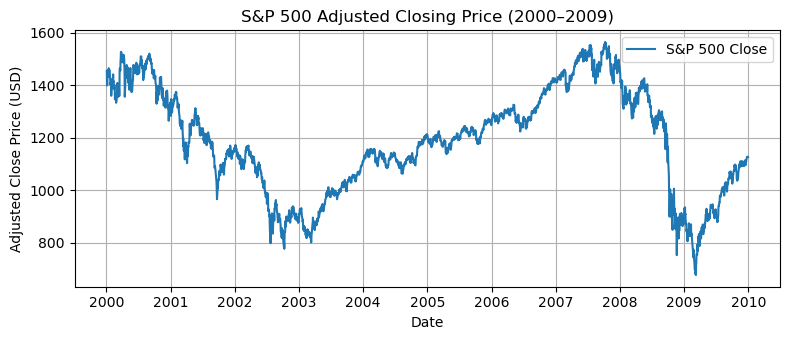

In [2]:
# Plot adjusted close over time
plt.figure(figsize=(8, 3.5))
plt.plot(sp500.index, sp500['Close'], label='S&P 500 Close')

# Get first 5 days
# A = sp500['Close']
# print(A.index[:5])  
# value = sp500['Close'].loc['2005-06-15']
# print(value[0])

plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.title('S&P 500 Adjusted Closing Price (2000–2009)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Returns

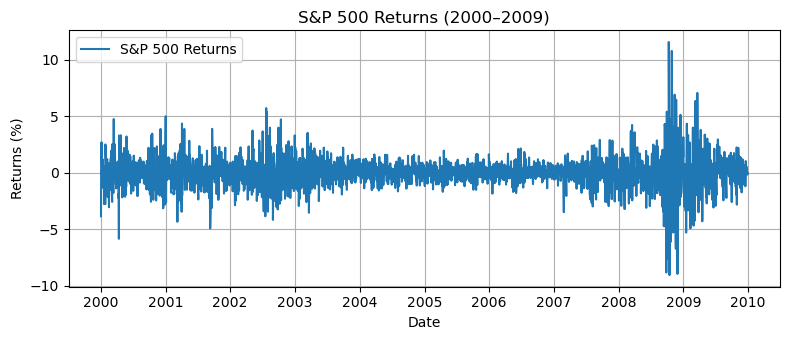

In [3]:

close_array = sp500['Close'].values.flatten()

returns = np.diff(close_array) / close_array[:-1]

plt.figure(figsize=(8, 3.5))
plt.plot(sp500.index[:-1], 100*returns, label='S&P 500 Returns')

plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.title('S&P 500 Returns (2000–2009)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Basic moments

In [4]:
import numpy as np
from scipy.stats import skew, kurtosis, jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox

# Assuming y is a numpy array or a list of data points

# Mean
mean_SaP = np.mean(returns)
# Standard deviation
std_SaP = np.std(returns)
# Min
min_SaP = np.min(returns)
# Max
max_SaP = np.max(returns)
# Skewness
skew_SaP = skew(returns)
# Kurtosis
kurt_SaP = kurtosis(returns)

# Autocorrelation (lag 1) for y
def sacf(y, lag):
    acf = np.corrcoef(y[:-lag], y[lag:])[0, 1]  # Autocorrelation of lag
    return acf

acf_SaP = sacf(returns, 1)

# Autocorrelation (lag 1) for y^2
acf_SaP_squared = sacf(np.square(returns), 1)
# Jarque-Bera test
jb_stat, jb_pval = jarque_bera(returns)

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
# Print results
print(color.BOLD + 'S&P 500 moment from 2000 to 2009' + color.END)
print(f'Mean: {100*mean_SaP} %')
print(f'Standard Deviation: {100*std_SaP} %')
print(f'Min: {100*min_SaP} %')
print(f'Max: {100*max_SaP} %')
print(f'Skewness: {skew_SaP}')
print(f'Kurtosis: {kurt_SaP}')
print(f'ACF (lag 1) for y: {100*acf_SaP} %')
print(f'ACF (lag 1) for y^2: {100*acf_SaP_squared} %')
print(f'Jarque-Bera Test: Stat = {jb_stat}, p-value = {100*jb_pval} %')

S&P 500 moment from 2000 to 2009
Mean: -0.00038660409279602203 %
Standard Deviation: 1.4002574512443813 %
Min: -9.034977808622578 %
Max: 11.580036951513694 %
Skewness: 0.09948007746030324
Kurtosis: 7.853638663417037
ACF (lag 1) for y: -8.83824851502897 %
ACF (lag 1) for y^2: 18.738961005242093 %
Jarque-Bera Test: Stat = 6462.517226129015, p-value = 0.0 %


### S&P 500 Volatility

Volatility si the standard deviation of returns. The Volatility is computed as

$\sigma_{\rm annual} = \sigma_{\rm period} \sqrt{\rm periods ~per ~year}$. So annualised volatility always goes with $\sqrt{252}$

In [17]:
value = sp500['Close'].loc['2000-01-01':'2001-12-31']
print(value.to_numpy().flatten())

[1206.57995605 1210.95996094 1216.95996094]


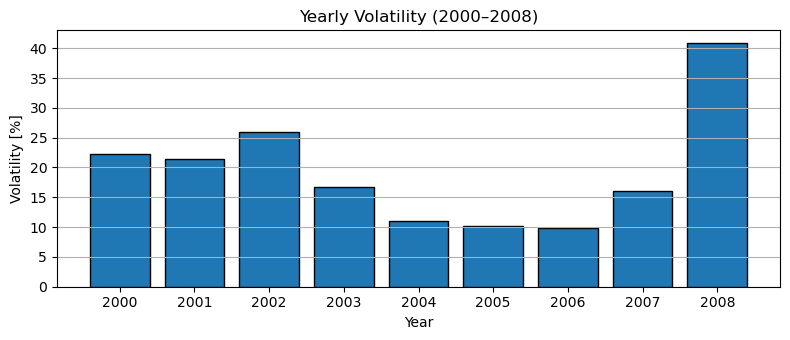

In [105]:
# Compute the returns and volatility per year
N_years = 9
year_vol = np.zeros(N_years,)
for i in range(N_years):
    start_date = "".join(("200", str(i),"-01-01"))
    end_date = "".join(("200", str(i+1),"-01-01"))
    values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
    year_return = np.diff(values_close) / values_close[:-1]
    year_vol[i] = 100*np.std(year_return) * np.sqrt(252)  # annualized daily volatility

years = ["200" + str(i) for i in range(N_years)]
# Plot chart
plt.figure(figsize=(8, 3.5))
plt.bar(years, year_vol, edgecolor='black')
plt.title('Yearly Volatility (2000–2008)')
plt.xlabel('Year')
plt.ylabel('Volatility [%]')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

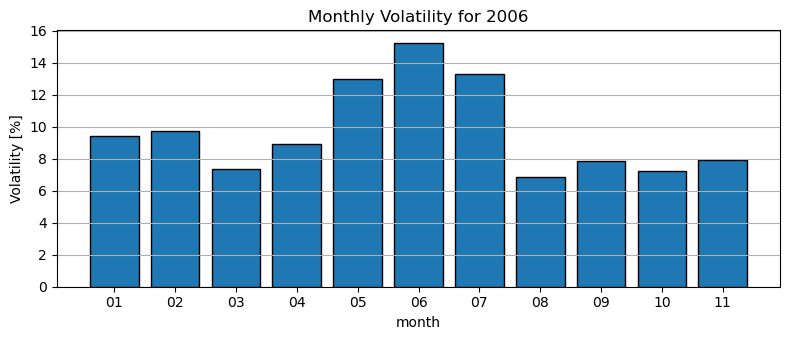

In [106]:
# Compute the returns and volatility per month
N_month = 12
month_vol = np.zeros(N_month-1,)
year = "2006"
for i in range(N_month-1):
    start_date = "".join((year, "-", str(i+1).zfill(2), "-01"))
    end_date   = "".join((year, "-", str(i+2).zfill(2), "-01"))
    values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
    month_return = np.diff(values_close) / values_close[:-1]
    month_vol[i] = 100*np.std(month_return) * np.sqrt(252)  # annualized daily volatility

months = [str(i+1).zfill(2) for i in range(N_month-1)]
# Plot chart
plt.figure(figsize=(8, 3.5))
plt.bar(months, month_vol, edgecolor='black')
plt.title("".join('Monthly Volatility for ' + year))
plt.xlabel('month')
plt.ylabel('Volatility [%]')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

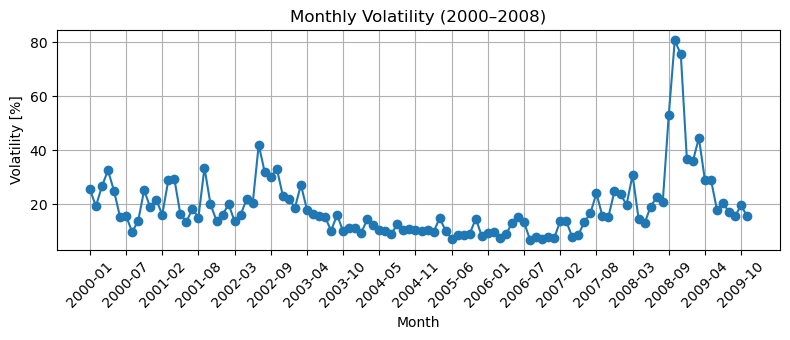

In [107]:
# Compute the returns and volatility per month
N_month = 12
N_years = 10
month_vol = []
month_labels = []
for j in range(N_years):
    year = f"200{j}"
    for i in range(N_month-1):
        start_date = f"{year}-{str(i+1).zfill(2)}-01"
        end_date   = f"{year}-{str(i+2).zfill(2)}-01"
        values_close = sp500['Close'].loc[start_date:end_date].values.flatten()
        month_return = np.diff(values_close) / values_close[:-1]
        month_vol.append(100*np.std(month_return) * np.sqrt(252))  # annualized daily volatility
        label = f"{year}-{str(i+1).zfill(2)}"
        month_labels.append(label)


plt.figure(figsize=(8, 3.5))
plt.plot(month_vol, marker='o')
plt.xticks(ticks=range(0, len(month_labels), 6), labels=month_labels[::6], rotation=45)
plt.title('Monthly Volatility (2000–2008)')
plt.xlabel('Month')
plt.ylabel('Volatility [%]')
plt.grid(True)
plt.tight_layout()
plt.show()

### ACF
A standard graphical method for exploring predictability in statistical data is the
autocorrelation function (ACF). The ACF measures how returns on one day are correlated with returns on previous days. If such correlations are statistically significant, we
have strong evidence for predictability.

### Fat tails
A random variable is said to have fat tails if it exhibits more
extreme outcomes than a normally distributed random variable with the same mean
and variance.